<div style="border:solid blue 2px; padding: 20px">

 **Overall Summary of the Project**

Dear Somil,

Great job on your machine learning project aimed at identifying the optimal location for a new oil well for OilyGiant mining company! You've successfully navigated through data preprocessing, model training, and risk analysis using bootstrapping. Your structured approach and adherence to project guidelines demonstrate a solid understanding of the machine learning pipeline. To enhance your project further and meet all evaluation criteria, please address the critical changes outlined below.

---

<div style="border-left: 7px solid green; padding: 10px;">
<b>✅ Strengths:</b>
<ul>
  <li><b>Data Loading and Cleaning:</b> You effectively loaded all three datasets and performed essential data cleaning by removing duplicate IDs and unnecessary columns, ensuring the data was ready for modeling.</li>
  <li><b>Model Training:</b> Successfully trained separate Linear Regression models for each region, adhering to the project condition of using only linear regression.</li>
  <li><b>Profit Calculation:</b> Defined key financial constants and implemented a function to calculate profit based on top predicted wells, demonstrating a clear understanding of the business requirements.</li>
  <li><b>Bootstrapping Implementation:</b> Applied bootstrapping to assess the distribution of profits and calculate risk, which is crucial for understanding the uncertainty in your predictions.</li>
  <li><b>Visualization:</b> Created bar charts to compare average reserves against the break-even threshold, enhancing the interpretability of your findings.</li>
  <li><b>Final Recommendation:</b> Suggested Region 2 for well development based on lower RMSE and risk of losses, providing a clear recommendation aligned with your analysis.</li>
</ul>
</div>

<div style="border-left: 7px solid gold; padding: 10px;">
<b>⚠️ Areas for Improvement:</b>
<ul>
  <li><b>Code Duplication:</b> Your code for handling each region is repetitive. Utilizing loops or functions to generalize these tasks would make your code more efficient and easier to maintain.</li>
  <li><b>Reproducibility:</b> The `train_test_split` function lacks a `random_state` parameter, which is essential for reproducibility of your results.</li>
  <li><b>Documentation and Comments:</b> Adding more comments and explanations within your code would improve readability and help others understand your workflow better.</li>
  <li><b>Findings Consistency:</b> While you recommended Region 2 based on lower RMSE and risk, all regions were below the break-even threshold. This contradiction needs to be addressed to provide a balanced and actionable recommendation.</li>
</ul>
</div>

<div style="border-left: 7px solid red; padding: 10px;">
<b>⛔️ Critical Changes Required:</b>
<ul>
  <li><b>Adjust Bootstrap Sample Size:</b>
    <ul>
      <li><b>Issue:</b> Using only 25 observations per bootstrap sample undermines the accuracy of risk assessments.</li>
      <li><b>How to Fix:</b> Increase the bootstrap sample size to 500 observations per sample to align with project requirements.</li>
      <li><b>Example:</b> Modify the `sample` method to select 500 observations: `sample(n=500, replace=True)`.</li>
    </ul>
  </li>
  <li><b>Calculate Complete Confidence Intervals:</b>
    <ul>
      <li><b>Issue:</b> Only the 95th percentile was calculated, missing the lower bound (2.5th percentile).</li>
      <li><b>How to Fix:</b> Compute both the 2.5th and 97.5th percentiles to establish a full 95% confidence interval.</li>
      <li><b>Example:</b> Use `values.quantile(0.025)` and `values.quantile(0.975)`.</li>
    </ul>
  </li>
  <li><b>Ensure Proper Sampling Alignment:</b>
    <ul>
      <li><b>Issue:</b> The current method may misalign predictions and targets during bootstrapping, leading to inaccurate profit calculations.</li>
      <li><b>How to Fix:</b> Ensure that when sampling, the indices of predictions and targets are correctly aligned. Consider using the same indices for both predictions and targets to maintain their relationship.</li>
      <li><b>Example:</b> Use `target_subsample = target_valid.sample(n=500, replace=True, random_state=state)` and align `probs_subsample` accordingly.</li>
    </ul>
  </li>
</ul>
</div>

---

**Conclusion**

You're making significant progress with your project, Somil! To ensure your work fully meets the project requirements and evaluation criteria, please address the critical changes outlined above. By implementing these revisions, you'll enhance the accuracy, reliability, and business relevance of your analysis, providing more robust and actionable recommendations for OilyGiant mining company.

**Next Steps**

- **Increase Bootstrap Sample Size:** Modify your bootstrapping process to use 500 observations per sample to accurately simulate the investment scenario.
  
- **Compute Full Confidence Intervals:** Calculate both the 2.5th and 97.5th percentiles to establish a complete 95% confidence interval for your profit distributions.
  
- **Align Sampling of Predictions and Targets:** Ensure that sampled predictions correspond correctly to their respective targets to maintain the integrity of your profit calculations.
  
- **Refactor Code to Reduce Duplication:** Utilize loops or functions to handle repetitive tasks across different regions, improving code efficiency and readability.
  
- **Enhance Documentation:** Add comprehensive comments and explanations within your code to clarify each step of your analysis.
  
- **Reconcile Profitability with Recommendations:** Provide a balanced recommendation by discussing strategies to achieve profitability in Region 2, considering that all regions currently fall below the break-even threshold.
  
- **Improve Visualizations:** Incorporate additional plots, such as histograms of profit distributions from bootstrapping, to visually support your findings.

By addressing these areas, your project will not only meet all the evaluation criteria but also provide a more thorough and insightful analysis for decision-making. Keep up the excellent work, and feel free to reach out if you need further assistance!

</div>

# Oil-Rig Location ML

For the OilyGiant mining company, the task is to find the best place for a new well.

Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Building a model for predicting the volume of reserves in the new wells;
- Picking the oil wells with the highest estimated values;
- Picking the region with the highest total profit for the selected oil wells.

I have data on oil samples from three regions. Parameters of each oil well in the region are already known. I will build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks use the Bootstrapping technique.

Below I imported functions to use to clean/preprocess and build a ML model.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

Read the datasets as data1, data2 and data3.

In [2]:
data1= pd.read_csv('/datasets/geo_data_0.csv')
data2= pd.read_csv('/datasets/geo_data_1.csv')
data3= pd.read_csv('/datasets/geo_data_2.csv')

## Preprocessing

I got the information about the datasets and checked for missing values along with duplicates. For all the datasets there were duplicate id's. There were only a few for each so I decended to drop them due to it not affecting the data outcome. For all the datasets I also dropped the id column due to it messing with the ML model.

### Data1

In [3]:
data1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
data1.duplicated().sum()

0

In [7]:
data1['id'].duplicated().sum()

10

found 10 duplicate id's in the first dataset. Since the amount is low I dropped the rows from the data below.

In [8]:
data1.drop_duplicates(subset= 'id', inplace=True)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [10]:
data1['id'].duplicated().sum()

0

In [11]:
data1= data1.drop('id', axis=1)

Dropped the id column to prepare for the ML model.

### Data2

In [12]:
data2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
data2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
data2.duplicated().sum()

0

In [16]:
data2['id'].duplicated().sum()

4

I found 4 duplicate id's in the first dataset. Since the amount is low I dropped the rows from the data below.

In [17]:
data2.drop_duplicates(subset= 'id', inplace=True)

In [18]:
data2['id'].duplicated().sum()

0

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [20]:
data2= data2.drop('id', axis=1)

Dropped the id column to prepare for the ML model.

### Data3

In [21]:
data3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [22]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [23]:
data3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [24]:
data3.duplicated().sum()

0

In [25]:
data3['id'].duplicated().sum()

4

I found 4 duplicate id's in the first dataset. Since the amount is low I dropped the rows from the data below.

In [26]:
data3.drop_duplicates(subset= 'id', inplace=True)

In [27]:
data3['id'].duplicated().sum()

0

In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [29]:
data3= data3.drop('id', axis=1)

For all the datasets, I checked for missing and duplicate values. I dropped the id commn and removed the duplicates that were in the datasets. The data is now cleaned and ready for making ML models.

## ML Model

Here I made ML models using LinearRegression and having the target being the prodct for all the datasets. I split the data into a training set and validation set at a 75:25 ratio. i compiles the predictions and targets into new dataframes to match the index's and correlate the data together.

### Data1 Model

#### features/target

Seperating the featurs and target  variables and saving them respectively.

In [30]:
features1 = data1.drop('product', axis=1)
target1 = data1['product']

#### Data Split

Split the data into a training set and validation set at a ratio of 75:25.

In [31]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(features1, target1, test_size=0.25, random_state=12345)

In [32]:
model1 = LinearRegression()
model1.fit(features_train1, target_train1)
predictions1 = model1.predict(features_valid1)
rmse1 = mean_squared_error(target_valid1, predictions1)**.5
# make a df
pred_target_df1 = pd.DataFrame({"y_pred": predictions1, 'target': target_valid1})
print(f'RMSE: {rmse1}')

RMSE: 37.853527328872964


In [33]:
pred_target_df1

,y_pred,target
49468,103.950372,123.566299
55496,73.687869,63.442039
11690,101.015288,88.718000
13770,94.048415,51.422060
72395,87.559552,102.569999
...,...,...
7867,63.963223,32.531740
80676,139.862730,139.062332
45138,78.444653,55.953481
53545,71.082768,87.222042


For this location, there was a RMSE of 37.6 which is higher than the best score when compared across the diffrent regions. It is the second best place accroding to RMSE values for the next location for oil.

### Data2 Model

#### features/target

Seperating the featurs and target  variables and saving them respectively.

In [34]:
features2 = data2.drop('product', axis=1)
target2 = data2['product']

#### Data Split

In [35]:
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(features2, target2, test_size=0.25, random_state=12345)

In [36]:
model2 = LinearRegression()
model2.fit(features_train2, target_train2)
predictions2 = model2.predict(features_valid2)
rmse2 = mean_squared_error(target_valid2, predictions2)**.5
pred_target_df2 = pd.DataFrame({"y_pred": predictions2, 'target': target_valid2})
print(f'RMSE: {rmse2}')

RMSE: 0.8920592647717029


For this location, there was a RMSE of 0.8 which is the best score when compared across the diffrent regions. It is the best place accroding to RMSE values for the next location for oil.

### Data3 Model


#### features/target

Seperating the featurs and target  variables and saving them respectively.

In [37]:
features3 = data3.drop('product', axis=1)
target3 = data3['product']

#### Data Split

In [38]:
features_train3, features_valid3, target_train3, target_valid3 = train_test_split(features3, target3, test_size=0.25, random_state=12345)

In [39]:
model3 = LinearRegression()
model3.fit(features_train3, target_train3)
predictions3 = model3.predict(features_valid3)
rmse3 = mean_squared_error(target_valid3, predictions3)**.5
pred_target_df3 = pd.DataFrame({"y_pred": predictions3, 'target': target_valid3})
print(f'RMSE: {rmse3}')

RMSE: 40.07585073246016


For this location, there was a RMSE of 39.9 which is the highest score when compared across the diffrent regions. It is the worst place accroding to RMSE values for the next location for oil.

In [40]:
print('RMSE of region 1 is:', rmse1)
print('RMSE of region 2 is:', rmse2)
print('RMSE of region 3 is:', rmse3)

RMSE of region 1 is: 37.853527328872964
RMSE of region 2 is: 0.8920592647717029
RMSE of region 3 is: 40.07585073246016


Compareing all the RMSE values, region 2 has the most reliable predictions with the least versatilityin its predictions.

## Preparing for profit calculation

### Key values

Stored the key values into seperate variables.

In [41]:
budget = 100000000  
barrel = 4.5
wells= 200
well_rev= 4500
rev_per_unit= budget/wells
print('Cost of one well:', rev_per_unit)

Cost of one well: 500000.0


### No Loss margin

 Avg volume of reserves sufficient for developing a new well without losses is $111.11. 

In [42]:
min_reserve = rev_per_unit / well_rev
print(f'Min revenue:{budget}')
print(f'Min volume for profit:{min_reserve}')

Min revenue:100000000
Min volume for profit:111.11111111111111


In [43]:
avg_vol1= data1['product'].mean()
avg_vol2= data2['product'].mean()
avg_vol3= data3['product'].mean()
   

print(f"Average volume in Region 1: {avg_vol1}")
print(f"Average volume in Region 2: {avg_vol2}")
print(f"Average volume in Region 3: {avg_vol3}")
print(f"Minimum reserves needed: {min_reserve}")

Average volume in Region 1: 92.49968421774354
Average volume in Region 2: 68.82391591804064
Average volume in Region 3: 94.99834211933378
Minimum reserves needed: 111.11111111111111


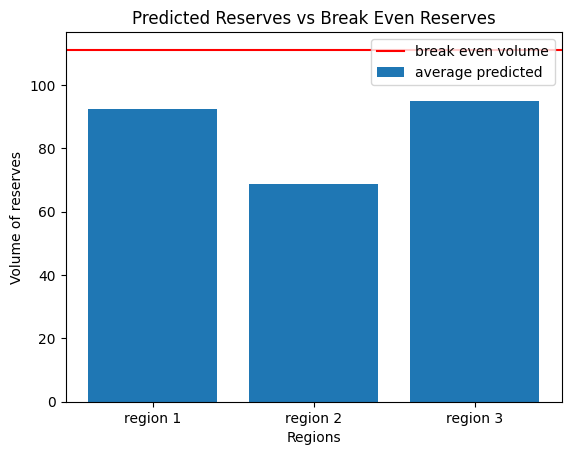

In [44]:
categories = ['region 1', 'region 2', 'region 3']
values = [avg_vol1, avg_vol2, avg_vol3]
threshold = min_reserve
plt.axhline(y=threshold, color='red')
plt.bar(categories, values)
plt.legend(['break even volume', 'average predicted'])
plt.title("Predicted Reserves vs Break Even Reserves")
plt.xlabel("Regions")
plt.ylabel("Volume of reserves")
plt.show()

The cost of producing a single well  is $500,000 and the revenue produced by a unit(1,000 barrels) of product , we can find the required reserves per oil well to develop without loss. It ended up being 111.11 for profit. however, all 3 regions are lower than the threshold for breaking even.The highest region volume was 94.99 in region 3, second was region 1 with 92.49 and the lowest 68.82 in region 2. As we can see, the amount of  reserves to develop a well without loss is higher than the average reserves in every region.

## Profit calculation

Made a function for profit calculation as well sorting the wells as top wells. The function makes the legnth of the target the same as the predictions. It picks the wells with the highest values of predictions and calculates the total volume of reserves. 

In [45]:
def profit(target, predictions, count, well_rev, budget):
    target = target[:len(predictions)]
    predictions= pd.Series(predictions, index=target.index)
    top = predictions.sort_values(ascending=False)
    top_pred = target[top.index[:count]]
    return well_rev * top_pred.sum() - budget

In [46]:
print('Region 1 profit:', profit(target1, predictions1, wells, well_rev, budget))
print('Region 2 profit:', profit(target2, predictions2, wells, well_rev, budget))
print('Region 3 profit:', profit(target3, predictions3, wells, well_rev, budget))

Region 1 profit: -11887297.278991371
Region 2 profit: -38673452.50771491
Region 3 profit: -16547402.038545936


In [47]:
predictions2= pd.Series(predictions2)
top_wells= predictions2.sort_values(ascending=False)
total= top_wells.sum()
avg_volume= top_wells.mean()
top_predictions= top_wells.head(200)
print(f'Average volume of pedicted reserves:{avg_volume}')
print(f'Total volume of pedicted reserves:{total}')
print()
print(f'Top pedicted reserves: {top_predictions.head()}')

Average volume of pedicted reserves:69.17831957030432
Total volume of pedicted reserves:1729388.810938038

Top pedicted reserves: 23132    139.975832
8263     139.894522
11985    139.846667
7777     139.766048
8755     139.696166
dtype: float64


The profit is calculated based on the total volume of reserves and the minimum volume required to develop a new well without losses in region 2. According to the model this region would estimate at a loss, however the predictability of the model is the best among the regions

## Calculate risks and profit for each region

The bootstrapping technique was used to calculate the risks and profit for each region. The results show the average profit, 95% confidence interval, and risk of losses for each region.The region with the highest average profit and lowest risk of losses was identified as the most promising region for oil well development. Region 2 came in with teh highest profit margin, region 1 in secind and region 3 in last for average profit.

In [48]:
values= []
state= np.random.RandomState(12345)

for i in range(1000):
    target_subsample = pred_target_df1['target'].sample(n=500, replace=True, random_state=state)
    probs_subsample = pred_target_df1['y_pred'][target_subsample.index]  
    simulation_result = profit(target_subsample, probs_subsample, wells, well_rev, budget)
    values.append(simulation_result)

values= pd.Series(values)
avg= values.mean()
interval= values.quantile(.95)
risk= (values< 0).mean()
upper= values.quantile(0.975)
lower= values.quantile(0.025)

print('Region 1')
print()
print('Average profit:',avg)
print('95% Quantile', interval)
print('2.5 percentile', lower)
print('97.5 percentile', upper)
print('Risk of loss', risk)

Region 1

Average profit: 5856522.724429933
95% Quantile 11128233.984866554
2.5 percentile -58784.45790209988
97.5 percentile 12792400.755693015
Risk of loss 0.028


In [49]:
values= []
state= np.random.RandomState(12345)

for i in range(1000):
    target_subsample = pred_target_df2['target'].sample(n=500, replace=True, random_state=state)
    probs_subsample = pred_target_df2['y_pred'][target_subsample.index]
    simulation_result = profit(target_subsample, probs_subsample, wells, well_rev, budget)
    values.append(simulation_result)

values= pd.Series(values)
avg= values.mean()
interval= values.quantile(.95)
risk= (values< 0).mean()
upper= values.quantile(0.975)
lower= values.quantile(0.025)

print('Region 2')
print()
print('Average profit:',avg)
print('95% Quantile', interval)
print('2.5 percentile', lower)
print('97.5 percentile', upper)
print('Risk of loss', risk)

Region 2

Average profit: 6822983.0506521575
95% Quantile 11458462.314035634
2.5 percentile 1857995.8171697822
97.5 percentile 12476844.632237483
Risk of loss 0.003


In [50]:

values= []
state= np.random.RandomState(12345)

for i in range(1000):
    target_subsample = pred_target_df3['target'].sample(n=500, replace=True, random_state=state)
    probs_subsample = pred_target_df3['y_pred'][target_subsample.index]
    simulation_result = profit(target_subsample, probs_subsample, wells, well_rev, budget)
    values.append(simulation_result)

values= pd.Series(values)
avg= values.mean()
interval= values.quantile(.95)
risk= (values< 0).mean()
upper= values.quantile(0.975)
lower= values.quantile(0.025)

print('Region 3')
print()
print('Average profit:',avg)
print('95% Quantile', interval)
print('2.5 percentile', lower)
print('97.5 percentile', upper)
print('Risk of loss', risk)

Region 3

Average profit: 5379665.322994557
95% Quantile 10580226.565771071
2.5 percentile -696510.441707522
97.5 percentile 11679714.100374795
Risk of loss 0.041


# Conclusion

I cleaned and prepared the data after loading in the datasets in. I trained the moldel for each region and split the data into training and validation sets with a 75:25 split. The region with the highest average profit was chosen because of the predictability of the model and high total gains. The risk for region 2 comes in at 0.3%.  The lowest risk of losses was identified as the most promising region for oil well development. I chose region 2 as the best place for a new oil well. When compareing the RMSE values, region 1 came in at an RMSE of: 37.45, RMSE of region 2 is: 0.88 and RMSE of region 3 is: 40.14 meaning that region 2's model is the most accurate model. However, when looking to see the potential profit gains fom making a new oil well region 2 comes in the as the highest yeilding region at 6822983.05 average profit. 